# Model evaluation

In [1]:
import pandas as pd
import numpy as np
import pickle
from tqdm import tqdm
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel

import matplotlib.pyplot as plt


import my_files
import my_preprocessing
from my_lda import MyCorpus, make_doc_path_list, doc_topics
import my_vis

### Load model, corpus and dictionary

In [2]:
# load LDA model
model_id = 'lda_25_1.0_0.002'
model_path = f'models/{model_id}.pkl'
model = my_files.load_model(model_path)

# load dictionary
dict_path = 'models/dictionary.dict'
dictionary = Dictionary.load(dict_path)

# make corpus
df = my_preprocessing.load_metadata()
df = my_preprocessing.drop_non_research(df)
doc_path_list = ['data/txt/' + file for file in df.filename]
corpus = MyCorpus(doc_path_list, my_preprocessing.clean_text, dictionary=dictionary)

### Topics per document

In [9]:
df = doc_topics(corpus, model)

path = f'models/{model_id}_doc_topics.csv.gz'
df.to_csv(path, compression='gzip')

100%|██████████| 15092/15092 [26:10<00:00,  9.61it/s]


In [10]:
df = pd.read_csv(path, compression='gzip', index_col=0)

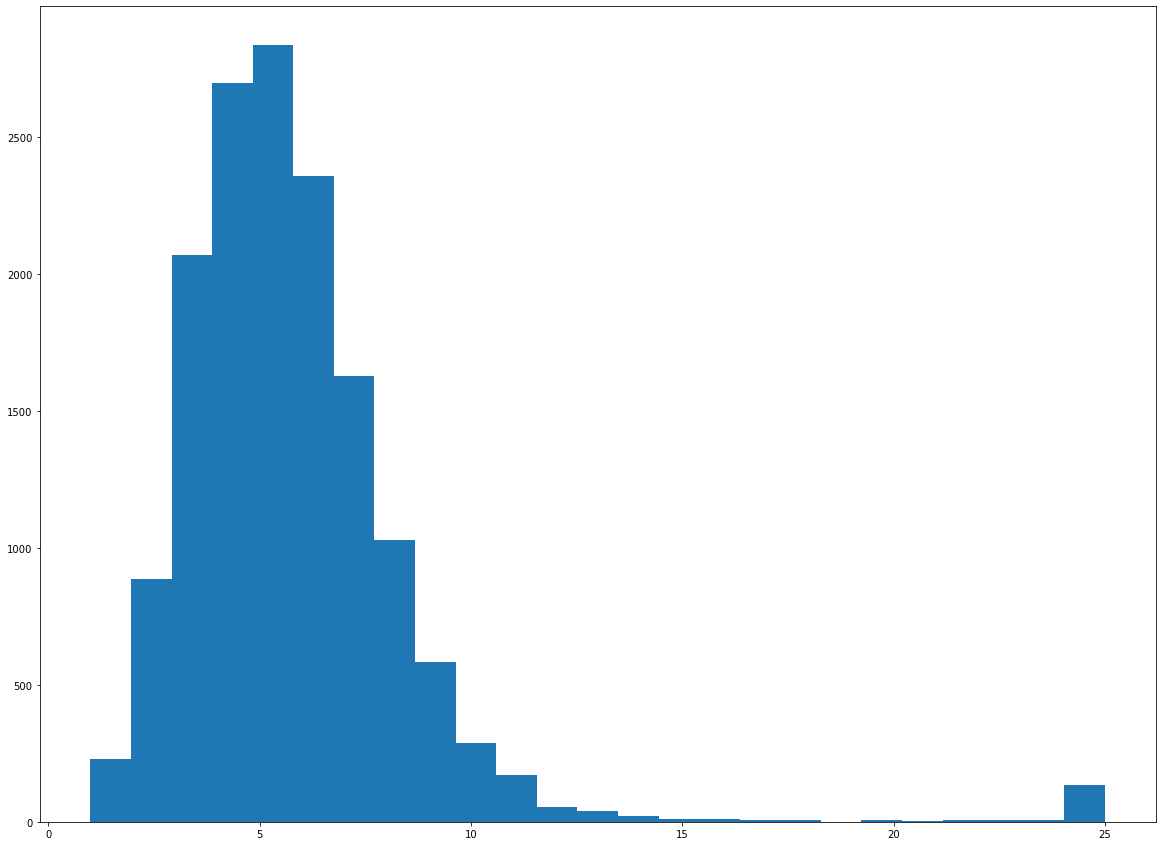

In [11]:
my_vis.plot_topics_per_doc(df)

### Words per topic

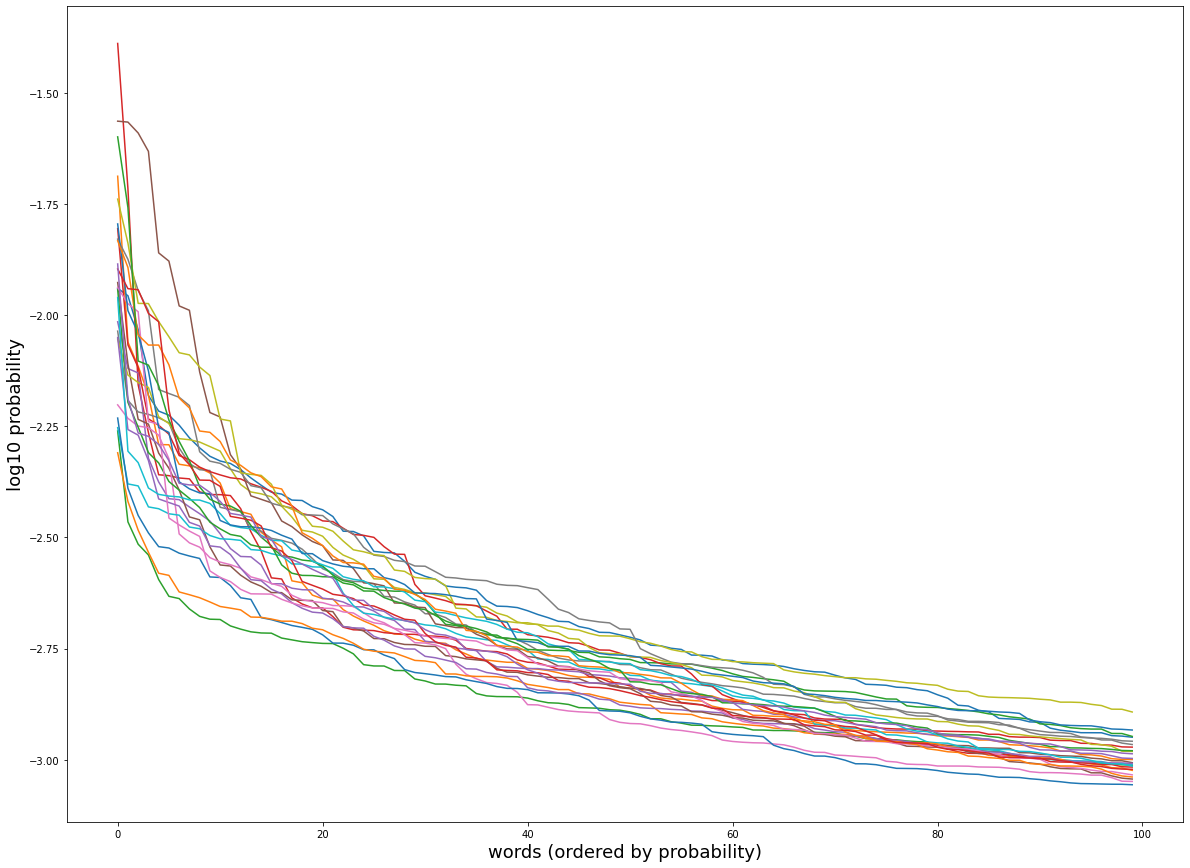

In [12]:
my_vis.plot_topic_words(model)